In [11]:
import sqlite3
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('../tosql/test.db')

df = pd.read_sql_query('SELECT * FROM tasks', conn)

In [3]:
len(df)

190

In [4]:
df.head()

,d,start,end,name,total,hours,minutes,note
0,12/23/2019,23:06,23:07,code,8,0,0,did some coding!
1,12/24/2019,08:37,08:55,read,1096,0,18,
2,12/24/2019,12:52,13:47,code,3325,0,55,bathroom break
3,12/24/2019,13:55,14:30,code,2129,0,35,break
4,12/24/2019,14:41,16:16,code,5709,1,35,


In [5]:
# add column with total hours
df['total_hours'] = df['total'] / 3600
df.head()

,d,start,end,name,total,hours,minutes,note,total_hours
0,12/23/2019,23:06,23:07,code,8,0,0,did some coding!,0.002222
1,12/24/2019,08:37,08:55,read,1096,0,18,,0.304444
2,12/24/2019,12:52,13:47,code,3325,0,55,bathroom break,0.923611
3,12/24/2019,13:55,14:30,code,2129,0,35,break,0.591389
4,12/24/2019,14:41,16:16,code,5709,1,35,,1.585833


In [6]:
# change d to datetime
df['d'] = pd.to_datetime(df.d)
df.head()

,d,start,end,name,total,hours,minutes,note,total_hours
0,2019-12-23,23:06,23:07,code,8,0,0,did some coding!,0.002222
1,2019-12-24,08:37,08:55,read,1096,0,18,,0.304444
2,2019-12-24,12:52,13:47,code,3325,0,55,bathroom break,0.923611
3,2019-12-24,13:55,14:30,code,2129,0,35,break,0.591389
4,2019-12-24,14:41,16:16,code,5709,1,35,,1.585833


In [7]:
df.sort_values(by='d')

,d,start,end,name,total,hours,minutes,note,total_hours
0,2019-12-23,23:06,23:07,code,8,0,0,did some coding!,0.002222
1,2019-12-24,08:37,08:55,read,1096,0,18,,0.304444
2,2019-12-24,12:52,13:47,code,3325,0,55,bathroom break,0.923611
3,2019-12-24,13:55,14:30,code,2129,0,35,break,0.591389
4,2019-12-24,14:41,16:16,code,5709,1,35,,1.585833
...,...,...,...,...,...,...,...,...,...
186,2020-05-15,02:00,03:12,math,4331,1,12,topology,1.203056
185,2020-05-15,00:08,01:34,code,5173,1,26,HackerRank,1.436944
187,2020-05-15,16:45,18:40,code,6902,1,55,HackerRank,1.917222
188,2020-05-16,00:23,03:44,code,12048,3,20,youtube,3.346667


### Trends over time

In [8]:
group = df.groupby('d')

In [147]:
# how many skipped days?
prev = 23
skips = 0
for date in df.d.unique():
    aa = str(date).split('-')
    day = aa[2][:2]
    if int(day) - prev > 1:
        skips += 1
skips

20

In [142]:
df.d

0     2019-12-23
1     2019-12-24
2     2019-12-24
3     2019-12-24
4     2019-12-24
         ...    
185   2020-05-15
186   2020-05-15
187   2020-05-15
188   2020-05-16
189   2020-05-16
Name: d, Length: 190, dtype: datetime64[ns]

In [133]:
time = df.groupby(['d']).sum()['total_hours']
time.index = pd.Series(time.index.format())

In [115]:
rolling = time.rolling(7).mean()
rolling.index = pd.Series(rolling.index.format())

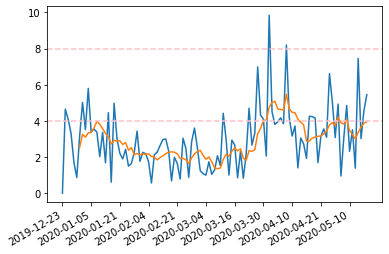

In [116]:
fig, ax = plt.subplots()
plt.plot(time)
plt.plot(rolling)
fig.autofmt_xdate()
plt.xticks(np.arange(0, len(rolling), 10))
plt.axhline(8, color='pink', linestyle='--')
plt.axhline(4, color='pink', linestyle='--')

plt.show()

In [30]:
??plt.xticks

In [166]:
reg = linear_model.LinearRegression()

In [183]:
reg.fit(df['total_hours'].values.reshape(-1, 1), df.d)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)